In [1]:
import pandas as pd 
import numpy as np
from scipy.stats import norm

In [2]:
df = pd.read_csv('/media/sf_My_Share/huawei_apr_jul5th.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-01,4.26,4.65,4.25,4.50,4.50,25343270
1,2019-04-02,4.52,4.52,4.41,4.45,4.45,17980443
2,2019-04-03,4.46,4.90,4.38,4.90,4.90,72388135
3,2019-04-04,4.91,5.15,4.73,5.02,5.02,96299675
4,2019-04-08,5.07,5.09,4.80,4.88,4.88,59813188


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
Date         60 non-null object
Open         60 non-null float64
High         60 non-null float64
Low          60 non-null float64
Close        60 non-null float64
Adj Close    60 non-null float64
Volume       60 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.4+ KB


In [54]:
df['Date'] = pd.to_datetime(df['Date'])

In [58]:
dftime = df[(df['Date'] > '2019-05-14') & (df['Date'] < '2019-05-30')]

In [59]:
dftime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 26 to 36
Data columns (total 9 columns):
Date             11 non-null datetime64[ns]
Open             11 non-null float64
High             11 non-null float64
Low              11 non-null float64
Close            11 non-null float64
Adj Close        11 non-null float64
Volume           11 non-null int64
Daily Lag        11 non-null float64
Daily Returns    11 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 880.0 bytes


In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([737194., 737196., 737198., 737200., 737202., 737204., 737206.,
        737208.]), <a list of 8 Text xticklabel objects>)

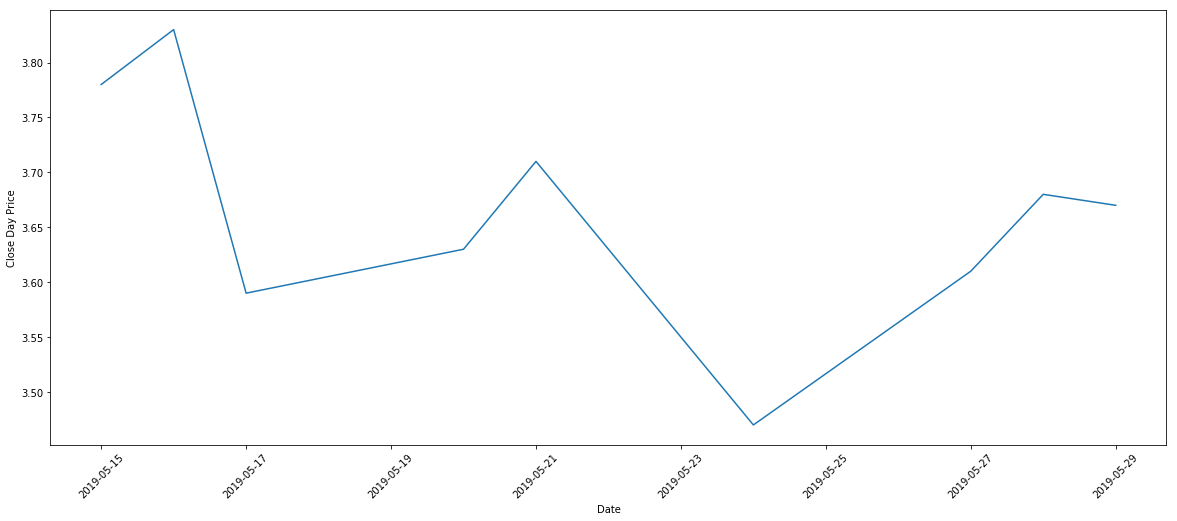

In [95]:
plt.figure(figsize=(20,8))
plt.plot('Date','Close',data=dftime)
plt.xlabel('Date')
plt.ylabel('Close Day Price')
plt.xticks(rotation=45)

In [96]:
df['Daily Lag'] = df['Close'].shift(1) #metric to shifting the ‘Close’ price by one day back
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns
0,2019-04-01,4.26,4.65,4.25,4.50,4.50,25343270,NaN,NaN
1,2019-04-02,4.52,4.52,4.41,4.45,4.45,17980443,4.50,0.011236
2,2019-04-03,4.46,4.90,4.38,4.90,4.90,72388135,4.45,-0.091837
3,2019-04-04,4.91,5.15,4.73,5.02,5.02,96299675,4.90,-0.023904
4,2019-04-08,5.07,5.09,4.80,4.88,4.88,59813188,5.02,0.028689


In [97]:
df['Daily Returns'] = (df['Daily Lag']/df['Close']) -1 #Daily returns tells us the returns that we 
df.head()                                              #obtain in a day after the stock price closes

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns
0,2019-04-01,4.26,4.65,4.25,4.50,4.50,25343270,NaN,NaN
1,2019-04-02,4.52,4.52,4.41,4.45,4.45,17980443,4.50,0.011236
2,2019-04-03,4.46,4.90,4.38,4.90,4.90,72388135,4.45,-0.091837
3,2019-04-04,4.91,5.15,4.73,5.02,5.02,96299675,4.90,-0.023904
4,2019-04-08,5.07,5.09,4.80,4.88,4.88,59813188,5.02,0.028689
